In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [ ]:
df = pd.read_csv("/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
age,age,0.0
sex,sex,0.0
cp,cp,0.0
trestbps,trestbps,0.0
chol,chol,0.0
fbs,fbs,0.0
restecg,restecg,0.0
thalach,thalach,0.0
exang,exang,0.0
oldpeak,oldpeak,0.0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:xlabel='target', ylabel='count'>

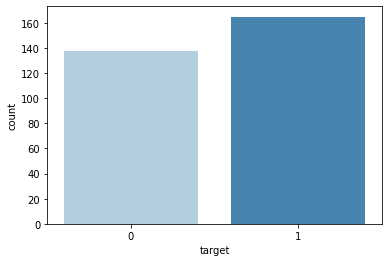

In [ ]:
cols= ["#C2C4E2","#EED4E5"]
sns.countplot(x= df['target'], palette = 'Blues')

### correlation between features
as we can see the correlation between all pairs of features is less than 0.5.
the features which have the most correlation with target are cp, thalac and slope.

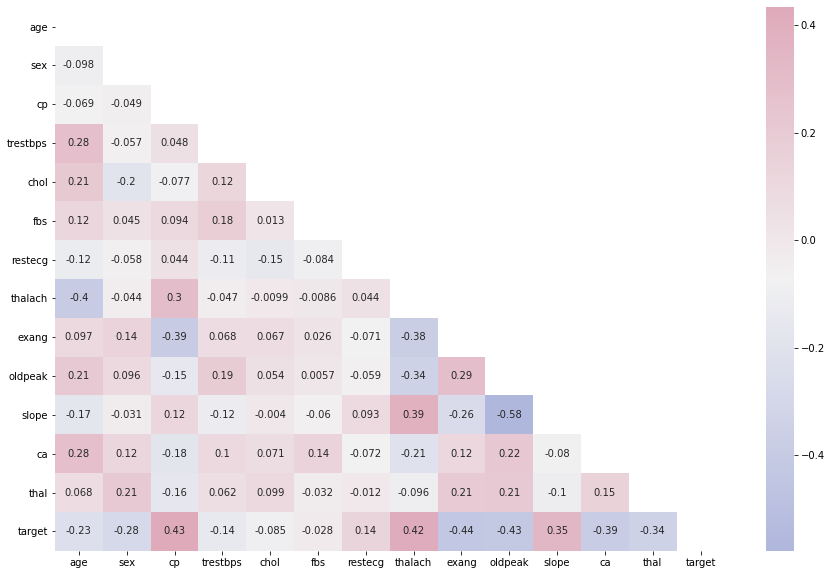

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,annot=True,cmap = cmap)
plt.show()

### distribution of non-categorial features

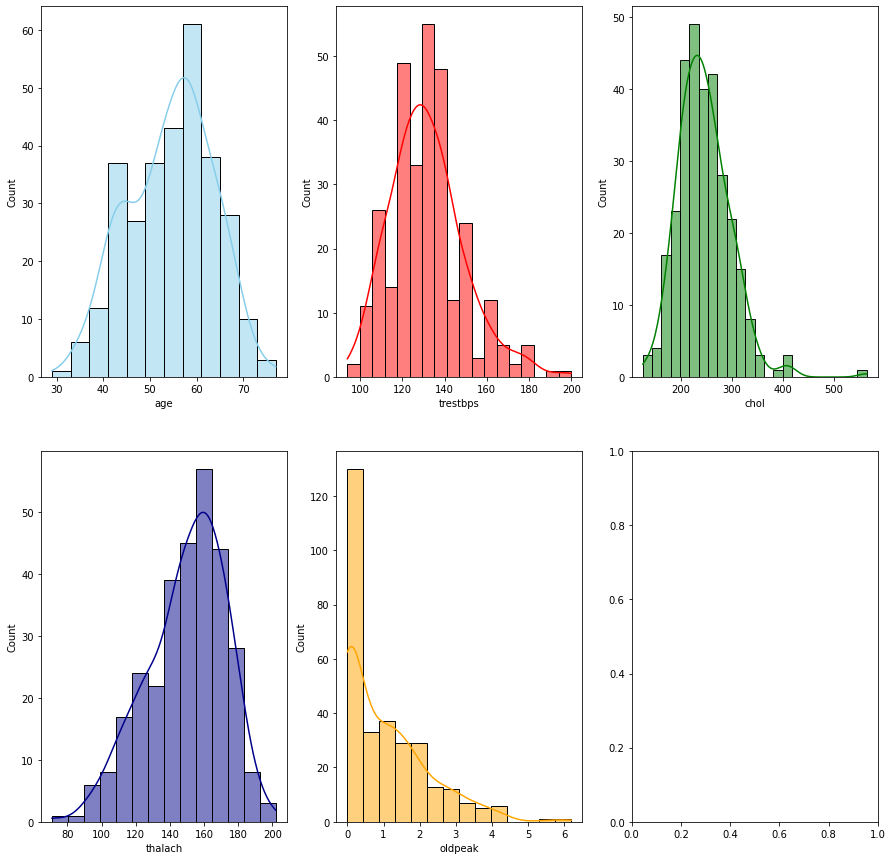

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

sns.histplot(data=df, x="age", color="skyblue", label="age", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="trestbps", color="red", label="trestbps", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="chol", color="green", label="chol", kde=True, ax=axs[0, 2])
sns.histplot(data=df, x="thalach", color="darkblue", label="thalach", kde=True, ax=axs[1, 0])
sns.histplot(data=df, x="oldpeak", color="orange", label="oldpeak", kde=True, ax=axs[1, 1])
plt.show()

# Train and Evaluate Models
For This purpose, we are going to construct a scikit-learn pipeline that includes steps for data preprocessing (scaling) and classification. We are going to use a few of the well-known classification model for the initial evaluation, then choose the best performing model and tune their hyperparameters to achieve the best result.

____
## import Libraries

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator

## Define Train and Test Data 

In [ ]:
x = df.drop(columns = "target")
y = df["target"]
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.33,random_state= 42)

##  initital evaluation 
For the initial evaluation and comparing the performance of different regression model, we use a pipeline.
First step in the pipeline is the scaler. This step is necessary for some models, so that all the feature have the same scale and their initial differences in the order of magnitude, will not impact the model. we use `StandardScaler()` to preserve the shape of the data.
The Second step in the pipeline is the regressor, for which we have 5 options.

* DecisionTreeClassifier,
* RandomForestClassifier,
* KNeighborsClassifier,
* LogisticRegression,
* SVC

We will define a function (`initial_eval()`) that takes pipeline and data as input, and generates score. For the score, we will report $R^2$.

In [ ]:
def initial_eval(pipeline, X_train, y_train, X_test, y_test, verbose=False):
    """
    Quickly trains modeling pipeline and evaluates on test data.    
    Returns original model, training RMSE, and testing RMSE as a tuple.
    """

    pipeline.fit(X_train, y_train)
    y_train_pred = pipeline.predict(X_train)

    train_score = pipeline.score(X_train,y_train)
    test_score = pipeline.score(X_test,y_test)

    if verbose:

        print(f"Train score: {train_score}")
        print(f"Test score: {test_score}")

    return train_score, test_score

In [ ]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC()
]

initial_score = pd.DataFrame(
    columns=['Class','Train/Test', 'Score'])

for classifier in classifiers:
    farm_pipeline = make_pipeline(
        StandardScaler(),
        classifier
    )
    
    r = initial_eval(farm_pipeline, x_train, y_train, x_test, y_test)
    initial_score = initial_score.append(pd.Series(
        [classifier.__class__.__name__,'Train Score', r[0]],
        index=initial_score.columns), ignore_index=True)
    initial_score = initial_score.append(pd.Series(
        [classifier.__class__.__name__,'Test Score', r[1]],
        index=initial_score.columns), ignore_index=True)

display(initial_score)

,Class,Train/Test,Score
0,DecisionTreeClassifier,Train Score,1.000000
1,DecisionTreeClassifier,Test Score,0.720000
2,RandomForestClassifier,Train Score,1.000000
3,RandomForestClassifier,Test Score,0.800000
4,KNeighborsClassifier,Train Score,0.857143
5,KNeighborsClassifier,Test Score,0.840000
6,LogisticRegression,Train Score,0.886700
7,LogisticRegression,Test Score,0.810000
8,SVC,Train Score,0.931034
9,SVC,Test Score,0.820000


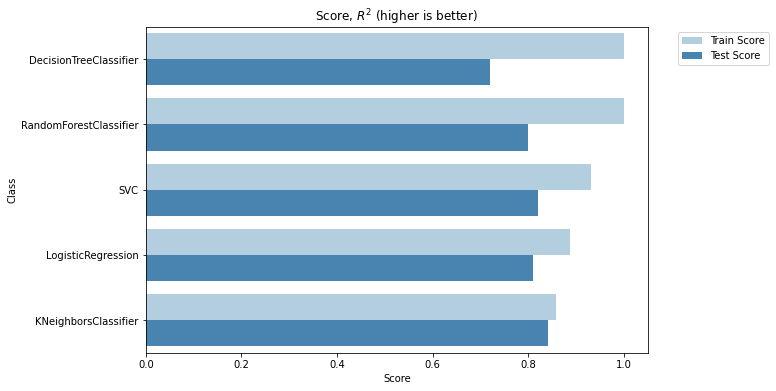

In [ ]:
plt.figure(figsize=(9, 6))

sns.barplot(y='Class', x='Score', 
            data=initial_score.sort_values(by=['Score'], ascending=False),
            hue='Train/Test',
            palette='Blues').set_title('Score, $R^2$ (higher is better)');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

Looking at above figure, we can see that our two best models are K Nearest Neighbors and SVC which have slightly higher test scores among other classifiers.
Moving on to hyperparameter tuning, we select our two best models, K Nearest Neighbors and SVC for further investigation.

-----
## Hyperparameter Tuning
For hyperparameter tuning, we are going to use scikit-learn's `GridSearchCV()`. Since we have two models to tune, we need to make a switcher that can act as a wrapper for our regression model. It is called `ClfSwitcher()`.

Then, we are going to construct a pipeline (same as before), which has scaler and classifier.
Finally, for the grid search, we use 5-fold cross-validation.

In [ ]:
class ClfSwitcher(BaseEstimator):
    """
    A Custom BaseEstimator that can switch between different Regressors.
    """

    def __init__(
        self,
        estimator=LogisticRegression(),
    ):

        self.estimator = estimator

    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self

    def predict(self, X, y=None):
        return self.estimator.predict(X)

    def score(self, X, y):
        return self.estimator.score(X, y)
    

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',ClfSwitcher())
])

parameters = [

    {
        'clf__estimator': [KNeighborsClassifier()],
        'clf__estimator__n_neighbors': [3, 5, 7,11],
        'clf__estimator__weights': ['uniform','distance'],
        'clf__estimator__metric': ['manhattan','minkowski'],
    },
    {
        'clf__estimator': [SVC()],
        'clf__estimator__C': [1,10,100],
        'clf__estimator__gamma': [1,0.1,0.001],
        'clf__estimator__kernel': ['linear'],
    }
]

gscv = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1,
                    return_train_score=False, verbose=3,refit=True)
gscv.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', ClfSwitcher())]),
             n_jobs=-1,
             param_grid=[{'clf__estimator': [KNeighborsClassifier(metric='manhattan',
                                                                  n_neighbors=11,
                                                                  weights='distance')],
                          'clf__estimator__metric': ['manhattan', 'minkowski'],
                          'clf__estimator__n_neighbors': [3, 5, 7, 11],
                          'clf__estimator__weights': ['uniform', 'distance']},
                         {'clf__estimator': [SVC()],
                          'clf__estimator__C': [1, 10, 100],
                          'clf__estimator__gamma': [1, 0.1, 0.001],
                          'clf__estimator__kernel': ['linear']}],
             verbose=3)

## Results

After the grid search is done, we can see the best parameters and use the best estimator to predict the results.

In [ ]:
gscv.best_params_

{'clf__estimator': KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance'),
 'clf__estimator__metric': 'manhattan',
 'clf__estimator__n_neighbors': 11,
 'clf__estimator__weights': 'distance'}

In [ ]:
y_train_pred = gscv.best_estimator_.predict(x_train)
y_test_pred = gscv.best_estimator_.predict(x_test)
print(gscv.best_estimator_.score(x_train,y_train))
print(gscv.best_estimator_.score(x_test,y_test))
print(classification_report(y_test,y_test_pred))

1.0
0.84
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.86      0.86      0.86        58

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



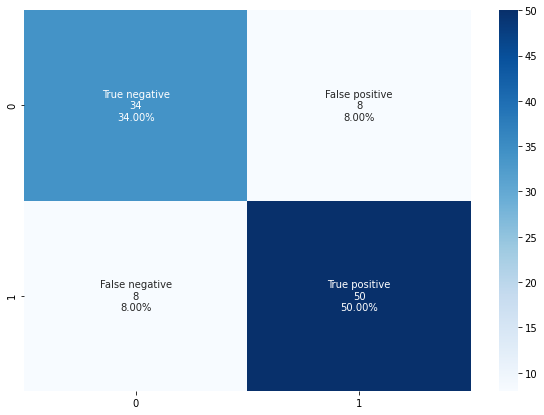

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)

group_names = ['True negative','False positive','False negative','True positive']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.show()